In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)

plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['image.cmap'] = 'gray'

In [ ]:
SEED_VALUE = 42

# Fix seed to make training deterministic.
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [ ]:
(X_train_all, y_train_all), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_valid = X_train_all[:10000]
X_train = X_train_all[10000:]

y_valid = y_train_all[:10000]
y_train = y_train_all[10000:]

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
print(y_train.shape)

(50000,)


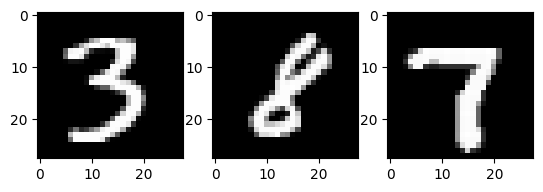

In [ ]:
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.axis(True)

    plt.imshow(X_train[i], cmap='gray')

    plt.subplots_adjust(wspace=0.2, hspace=0.2)

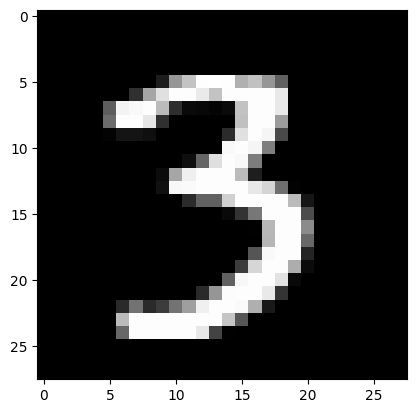

In [ ]:
plt.imshow(X_train[0])

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 150, 195, 254,
        255, 254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  48, 166, 224, 253, 253, 234,
        196, 253, 253, 253, 253, 233,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  93, 244, 249, 253, 187,  46,  10,   8,
          4,  10, 194, 253, 253, 233,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 107, 253, 253, 230,  48,   0,   0,   0,
          0,   0, 192, 253, 253, 156,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3,  20,  20,  15,   0,   0,   0,   0,
          0,  43, 224, 253, 245,  74,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 249, 253, 245, 126,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  14, 101,
        223, 253, 248, 124,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 166, 239, 253,
        253, 253, 187,  30,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  16, 248, 250, 253,
        253, 253, 253, 232, 213, 111,   2,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  43,  98,
         98, 208, 253, 253, 253, 253, 187,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   9,  51, 119, 253, 253, 253,  76,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   1, 183, 253, 253, 139,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 182, 253, 253, 104,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  85, 249, 253, 253,  36,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  60, 214, 253, 253, 173,  11,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  98, 247, 253, 253, 226,   9,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42,
        150, 252, 253, 253, 233,  53,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  42, 115,  42,  60, 115, 159, 240,
        253, 253, 250, 175,  25,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 187, 253, 253, 253, 253, 253, 253,
        253, 197,  86,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 10

In [ ]:
# Makes from every 28*28 cells a block
# for Prediction we must hace percentage of being the same number which is between 0 and 255, so we divide it by 255

X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_train = X_train.astype("float32") / 255

X_test = X_test.reshape((X_test.shape[0], 28 * 28))
X_test = X_test.astype("float32") / 255

X_valid = X_valid.reshape((X_valid.shape[0], 28 * 28))
X_valid = X_valid.astype("float32") / 255

X_train.shape

(50000, 784)

In [ ]:
# Convert integer labels to one-hot encoded vectors

y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test  = to_categorical(y_test)

y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
# Instantiate the model.
model = tf.keras.Sequential()

# Build the model.
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],))) # input_shape is just for layer 1
model.add(Dense(128, activation='relu'))
model.add(Dense(10,  activation="softmax")) # softmax activation function gives percentages for classification. that will be just in last layer

# Display the model summary.
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# model.compile(optimizer="rmsprop",
#              loss="categorical_crossentropy",
#              metrics=["accuracy"])

model.compile(optimizer='Adam',loss='MSE',metrics='accuracy') # MSE loss is for classification too

In [ ]:
# epochs is the number of forward and backward process

# Ex: If batch_size is 64, we input our data in 64 batches.
#     So every batch will have all/batch_size members.
#     The lesser batch_size we have, the more high variance (Overfit) we will have

training_results = model.fit(X_train,
                             y_train,
                             epochs=21,
                             batch_size=64,
                             validation_data=(X_valid, y_valid))

Epoch 1/21
782/782 [==============================] - 8s 9ms/step - loss: 0.0134 - accuracy: 0.9138 - val_loss: 0.0070 - val_accuracy: 0.9548
Epoch 2/21
782/782 [==============================] - 8s 10ms/step - loss: 0.0063 - accuracy: 0.9596 - val_loss: 0.0058 - val_accuracy: 0.9631
Epoch 3/21
782/782 [==============================] - 6s 8ms/step - loss: 0.0045 - accuracy: 0.9709 - val_loss: 0.0050 - val_accuracy: 0.9669
Epoch 4/21
782/782 [==============================] - 8s 10ms/step - loss: 0.0036 - accuracy: 0.9778 - val_loss: 0.0046 - val_accuracy: 0.9703
Epoch 5/21
782/782 [==============================] - 6s 8ms/step - loss: 0.0030 - accuracy: 0.9814 - val_loss: 0.0041 - val_accuracy: 0.9730
Epoch 6/21
782/782 [==============================] - 8s 10ms/step - loss: 0.0025 - accuracy: 0.9848 - val_loss: 0.0045 - val_accuracy: 0.9703
Epoch 7/21
782/782 [==============================] - 7s 9ms/step - loss: 0.0022 - accuracy: 0.9866 - val_loss: 0.0046 - val_accuracy: 0.9713
Epo

In [ ]:
model.evaluate(X_test,y_test,batch_size=64)

157/157 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 0.9766


[0.003959922585636377, 0.9765999913215637]

In [ ]:
# Details of this function??????????????

def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):

    fig, ax = plt.subplots()

    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]

    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])

    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, 20])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)
    plt.show()
    plt.close()

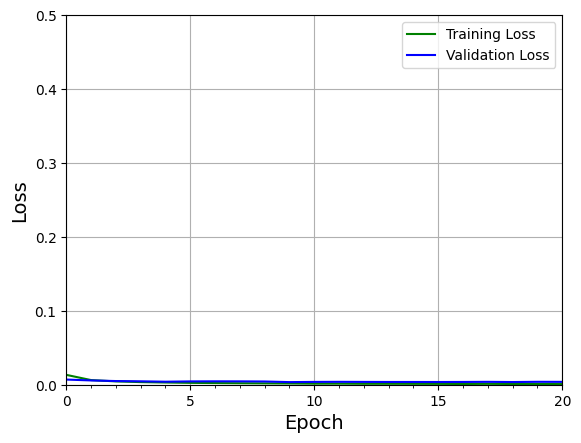

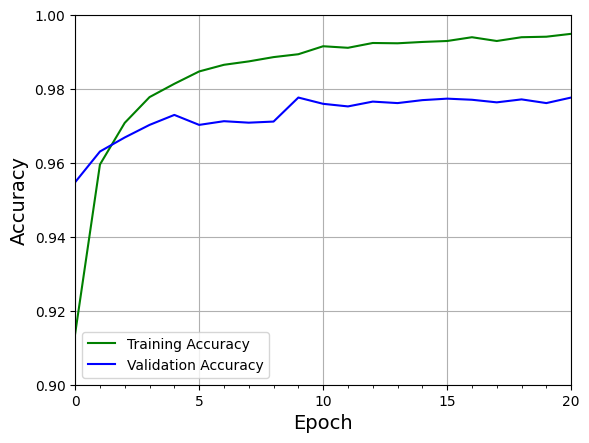

In [ ]:
# Retrieve training results.
train_loss = training_results.history["loss"]
train_acc  = training_results.history["accuracy"]
valid_loss = training_results.history["val_loss"]
valid_acc  = training_results.history["val_accuracy"]

plot_results([ train_loss, valid_loss ],
            ylabel="Loss",
            ylim = [0.0, 0.5],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);

plot_results([ train_acc, valid_acc ],
            ylabel="Accuracy",
            ylim = [0.9, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

In [ ]:
predictions = model.predict(X_test)
index = 0 # up to 9999
print('Ground truth for test digit: ',y_test[index])
print('\n');
print('Predictions for each class:\n')
for i in range(10):
    print('digit:', i, ' probability: ', predictions[index][i])

313/313 [==============================] - 1s 2ms/step
Ground truth for test digit:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


Predictions for each class:

digit: 0  probability:  2.6247764e-16
digit: 1  probability:  1.8901339e-12
digit: 2  probability:  6.2397865e-11
digit: 3  probability:  1.992754e-08
digit: 4  probability:  1.5941708e-16
digit: 5  probability:  5.8870194e-13
digit: 6  probability:  1.6192968e-20
digit: 7  probability:  0.99999994
digit: 8  probability:  1.4530444e-15
digit: 9  probability:  9.9337395e-14


In [ ]:
# Generate predictions for the test dataset.
predictions = model.predict(X_test)

# For each sample image in the test dataset, select the class label with the highest probability.
predicted_labels = [np.argmax(i) for i in predictions]

313/313 [==============================] - 1s 3ms/step


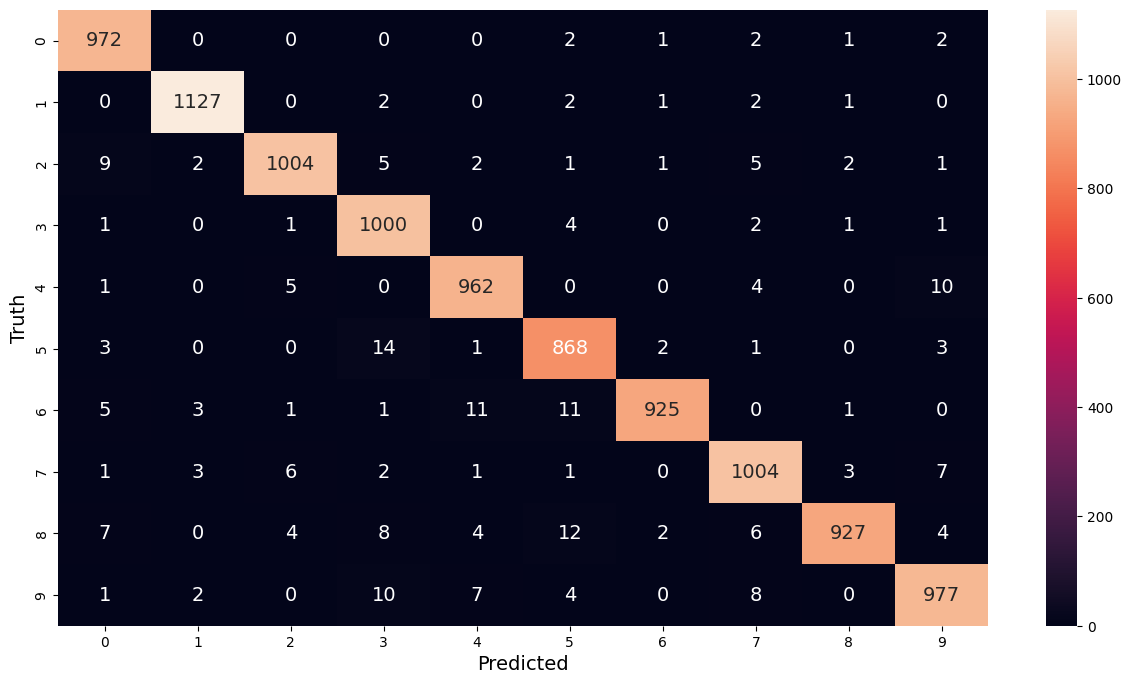

In [ ]:
# What does exactly this plot?????????

# Convert one-hot encoded labels to integers.
y_test_integer_labels = tf.argmax(y_test, axis=1)

# Generate a confusion matrix for the test dataset.
cm = tf.math.confusion_matrix(labels=y_test_integer_labels, predictions=predicted_labels)

# Plot the confusion matrix as a heatmap.
plt.figure(figsize=[15, 8])
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 14})
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

5


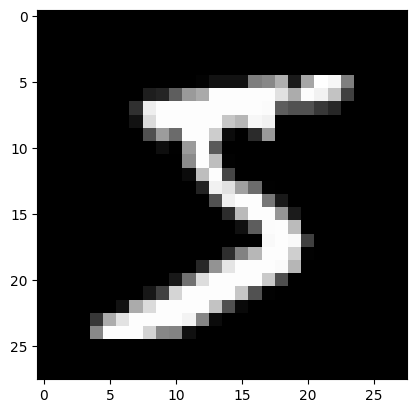

In [ ]:
# For one member

plt.imshow(X_train_all[0])
print(y_train_all[0])

a=X_train_all[0].reshape(1,28*28)
a=a.astype('float32')/255

In [ ]:
# It shows that is 6

model.predict(a)

1/1 [==============================] - 0s 24ms/step


array([[2.49467656e-20, 1.44556783e-10, 3.31439592e-17, 2.99112380e-01,
        5.37355717e-26, 7.00887561e-01, 1.18199715e-23, 8.86282506e-15,
        5.62195884e-16, 3.69912868e-12]], dtype=float32)

In [ ]:
# What are verbose, random_sate and ...?